# PCA 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

'pip3' 不是內部或外部命令、可執行的程式或批次檔。
'pip3' 不是內部或外部命令、可執行的程式或批次檔。


載入套件

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition # <= New 
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

載入 iris 資料集

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

------

## sklearn.decomposition.PCA
```
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)[source]
Principal component analysis (PCA)
```

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.

Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.

Read more in the User Guide.

### Parameters:	
#### n_components : int, float, None or string
Number of components to keep. if n_components is not set all components are kept:

n_components == min(n_samples, n_features)
If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

If svd_solver == 'arpack', the number of components must be strictly less than the minimum of n_features and n_samples.

Hence, the None case results in:

n_components == min(n_samples, n_features) - 1
#### copy : bool (default True)
If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.

#### whiten : bool, optional (default False)
When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

#### svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}
#### auto :
the solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.

#### full :
run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing

#### arpack :
run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)

#### randomized :
run randomized SVD by the method of Halko et al.

New in version 0.18.0.

#### tol : float >= 0, optional (default .0)
Tolerance for singular values computed by svd_solver == ‘arpack’.

New in version 0.18.0.

#### iterated_power : int >= 0, or ‘auto’, (default ‘auto’)
Number of iterations for the power method computed by svd_solver == ‘randomized’.

New in version 0.18.0.

#### random_state : int, RandomState instance or None, optional (default None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Used when svd_solver == ‘arpack’ or ‘randomized’.

New in version 0.18.0.

### Attributes:	
#### components_ : array, shape (n_components, n_features)
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

#### explained_variance_ : array, shape (n_components,)
The amount of variance explained by each of the selected components.

Equal to n_components largest eigenvalues of the covariance matrix of X.

New in version 0.18.

#### explained_variance_ratio_ : array, shape (n_components,)
Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

#### singular_values_ : array, shape (n_components,)
The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

#### mean_ : array, shape (n_features,)
Per-feature empirical mean, estimated from the training set.

Equal to X.mean(axis=0).

#### n_components_ : int
The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.

#### noise_variance_ : float
The estimated noise covariance following the Probabilistic PCA model from Tipping and Bishop 1999. See “Pattern Recognition and Machine Learning” by C. Bishop, 12.2.1 p. 574 or http://www.miketipping.com/papers/met-mppca.pdf. It is required to compute the estimated data covariance and score samples.

Equal to the average of (min(n_features, n_samples) - n_components) smallest eigenvalues of the covariance matrix of X.

------

設定 模型 估計參數

In [6]:
centers = [[1, 1], [-1, -1], [1, -1]]

# Erwin: Keep 3 components instead of 4
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

In [12]:
# Run PCA
pca.fit(X)
X = pca.transform(X)

# Erwin: after transform, the X.shape becomes 3
print(f'X.shape = {X.shape}')
pca

X.shape = (150, 3)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

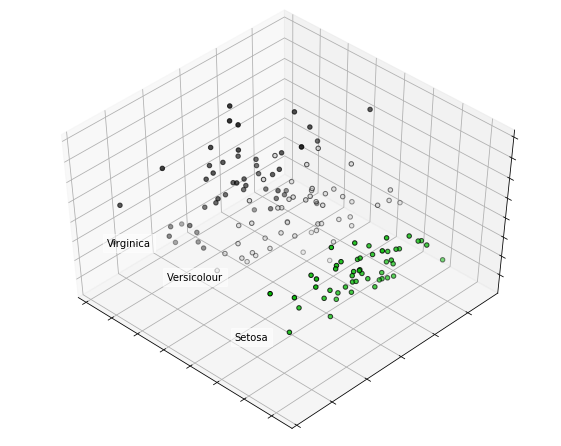

In [10]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

* Note: 以上只有降低維度，重新投射在 Scatter 上面看分布，並沒有做 predict

* Decomposition 之後, 分布看起來也很理想